# Lesson 04 
# Aeden Jameson

## Best Practices for Assignments & Milestones

- <b>Break the assignment into sections - one section per numbered requirement.</b> Each assignment has numbered requirements/instructions e.g. "1. Read the CIFAR-10 dataset". Each requirement should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Break the milestone into sections - one section for each item in the rubric.</b> Each milestone has rubric items e.g. "5. Handle class imbalance problem". Each rubric item should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Include comments, with block comments preferred over in-line comments.</b> A good habit is to start each code cell with comments.

The above put into a useful pattern:

<b>Markdown cell:</b> Requirement #1: Read the CIFAR-10 dataset<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #2: Explore the data<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #3: Preprocess the data and prepare for classification<br>
<b>Code cell:</b>: Comments followed by code<br>

For more information:
- A good notebook example: [DataFrame Basics](https://github.com/Tanu-N-Prabhu/Python/blob/master/Pandas/Pandas_DataFrame.ipynb) 
- More example notebooks: [A gallery of interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#pandas-for-data-analysis)
- [PEP 8 on commenting](https://www.python.org/dev/peps/pep-0008/)
- [PEP 257 - docstrings](https://www.python.org/dev/peps/pep-0257/)

Occasionally an assignment or milestone will ask you to do something other than write Python code e.g. ask you turn in a .docx file. In which case, please use logical structuring, but the specific notes above may not apply.

## Step 1: Read & Explore the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy.stats as ss


#### Load & Prepare Data

In [2]:
import requests
import re

def prepare(fileName = "http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data"):
    data = pd.read_csv(fileName, header=None, na_values=['?'])

    # Parse the columns out of the names file.
    names = requests.get('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names')
    data.columns = re.findall(r'\@attribute (\w*)', names.text)
    
    # These fields are categorical
    data = data.astype({'state':object,'county':object,'community':object,'communityname':object})
    
    # According to the name files the fold variable is used to debug analysis so we will drop it.
    data = data.drop(columns=['fold'], axis=1)
    
    return data

communities = prepare()
print('Prepared...')

Prepared...


In [3]:
communities.head()

,state,county,community,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


#### Impute Categorical Data

In [4]:
for c in ['state','county','community','communityname']:
    communities[c].fillna(0,inplace=True)

#### Impute Numeric 

In [5]:
communities.shape

(1994, 127)

In [6]:
cols_with_missing = communities.columns[communities.isnull().any()]
communities[cols_with_missing].isnull().sum()

OtherPerCap                1
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldOps       1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
dtype: int64

We can see that approximately 85% of the data is missing from all but the *OtherPerCap* field. It does make sense to drop those fields. However because each row represents an observation about crime in a community we have the option of doing two separate analysis for our feature selection. Those communities with those fields and without.

In [7]:
communities['OtherPerCap'].fillna(communities['OtherPerCap'].mean(), inplace=True)

Let's use those communities with the data because many of the fields appear potentially relevant as features.

In [8]:
complete_comms = communities.dropna()

## Step 2.a: Filter Methods

### Pearson's Correlation Coefficient

In [9]:
corrs = complete_comms.corr(method = 'pearson').round(4)
corrs = corrs.sort_values(by=['ViolentCrimesPerPop'], ascending=False)
corrs['ViolentCrimesPerPop'].head(10)

ViolentCrimesPerPop    1.0000
PctIlleg               0.7291
racepctblack           0.6586
PctPopUnderPov         0.6158
pctWPubAsst            0.5814
PctUnemployed          0.5480
TotalPctDiv            0.5460
PctPolicBlack          0.5435
FemalePctDiv           0.5383
PctVacantBoarded       0.5360
Name: ViolentCrimesPerPop, dtype: float64

#### Selecting Features

Since we're attemping to understand violent crime we will consider even moderately associated variables.

In [108]:
corrs['ViolentCrimesPerPop'][corrs['ViolentCrimesPerPop'] > .3]

ViolentCrimesPerPop    1.0000
PctIlleg               0.7291
racepctblack           0.6586
PctPopUnderPov         0.6158
pctWPubAsst            0.5814
PctUnemployed          0.5480
TotalPctDiv            0.5460
PctPolicBlack          0.5435
FemalePctDiv           0.5383
PctVacantBoarded       0.5360
PctHousNoPhone         0.5342
MalePctDivorce         0.5225
NumIlleg               0.5103
PctPolicMinor          0.4866
PctWOFullPlumb         0.4382
NumUnderPov            0.4372
PctNotHSGrad           0.4348
PctHousLess3BR         0.4107
PctLargHouseFam        0.4025
NumStreet              0.3962
NumInShelters          0.3944
HousVacant             0.3891
PolicCars              0.3817
MalePctNevMarr         0.3801
LemasTotalReq          0.3529
OfficAssgnDrugUnits    0.3429
LemasSwornFT           0.3422
PolicOperBudg          0.3382
PctPersDenseHous       0.3328
PctLess9thGrade        0.3234
numbUrban              0.3155
population             0.3152
PctLargHouseOccup      0.3052
MedRentPct

## Step 2.b: Wrapper Methods

### Backward Selection

Optimal number of features : 24


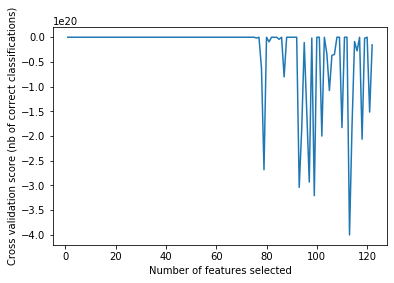

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split


features = complete_comms.drop(columns=['ViolentCrimesPerPop','state','county','community','communityname'])
target = complete_comms['ViolentCrimesPerPop']


ols = LinearRegression()
rfecv = RFECV(estimator=ols, step=1, scoring='neg_mean_squared_error')
rfecv.fit(features, target)        

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### Selected Features

In [27]:
features.columns[rfecv.support_]

Index(['population', 'agePct65up', 'numbUrban', 'pctWInvInc', 'pctWSocSec',
       'PctNotHSGrad', 'PctKids2Par', 'PctImmigRec5', 'PctImmigRec10',
       'PctRecImmig8', 'PctRecImmig10', 'PersPerOwnOccHous',
       'PersPerRentOccHous', 'PctPersOwnOccup', 'PctHousLess3BR',
       'PctHousOwnOcc', 'RentLowQ', 'MedRent', 'PctForeignBorn',
       'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'PolicPerPop',
       'PolicOperBudg'],
      dtype='object')

#### Compare Predections

In [28]:
yhat_backward = rfecv.predict(features)
ols = ols.fit(features, target)
yhat_estimator = ols.predict(features)
np.corrcoef([yhat_backward, yhat_estimator, target])

array([[1.        , 0.93562685, 0.84496189],
       [0.93562685, 1.        , 0.9030971 ],
       [0.84496189, 0.9030971 , 1.        ]])

### Forward Selection

In [29]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 2.6 MB/s eta 0:00:01


In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt

ols = LinearRegression()

stepwise_selector = SFS(ols, 
    k_features = "parsimonious", 
    forward = True, 
    floating = False, 
    scoring = 'neg_mean_squared_error', 
    cv = 5)

stepwise_selector = stepwise_selector.fit(features.values, target)
print("Forward Selection Done ....")

Forward Selection Done ....


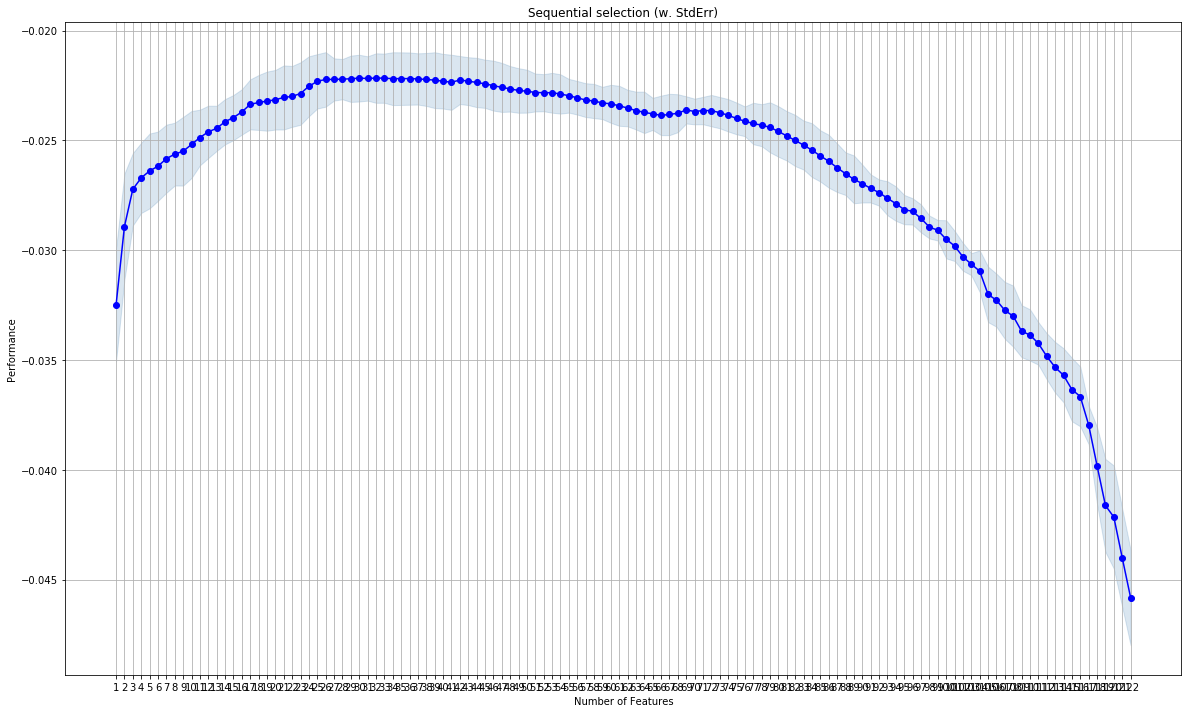

In [73]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(stepwise_selector.get_metric_dict(), kind = 'std_err',figsize=(20, 12))
plt.title('Sequential selection (w. StdErr)')
plt.grid()
plt.show()

In [74]:
import operator
from operator import itemgetter 

stepwise_selector.get_metric_dict()

## Step 2.c: Embedded methods.

### Lasso

In [85]:
from sklearn import linear_model

alpha = 0.001 # increasing alpha can shrink more variable coefficients down to 0
clf = linear_model.Lasso(alpha = alpha)
clf.fit(features, target);

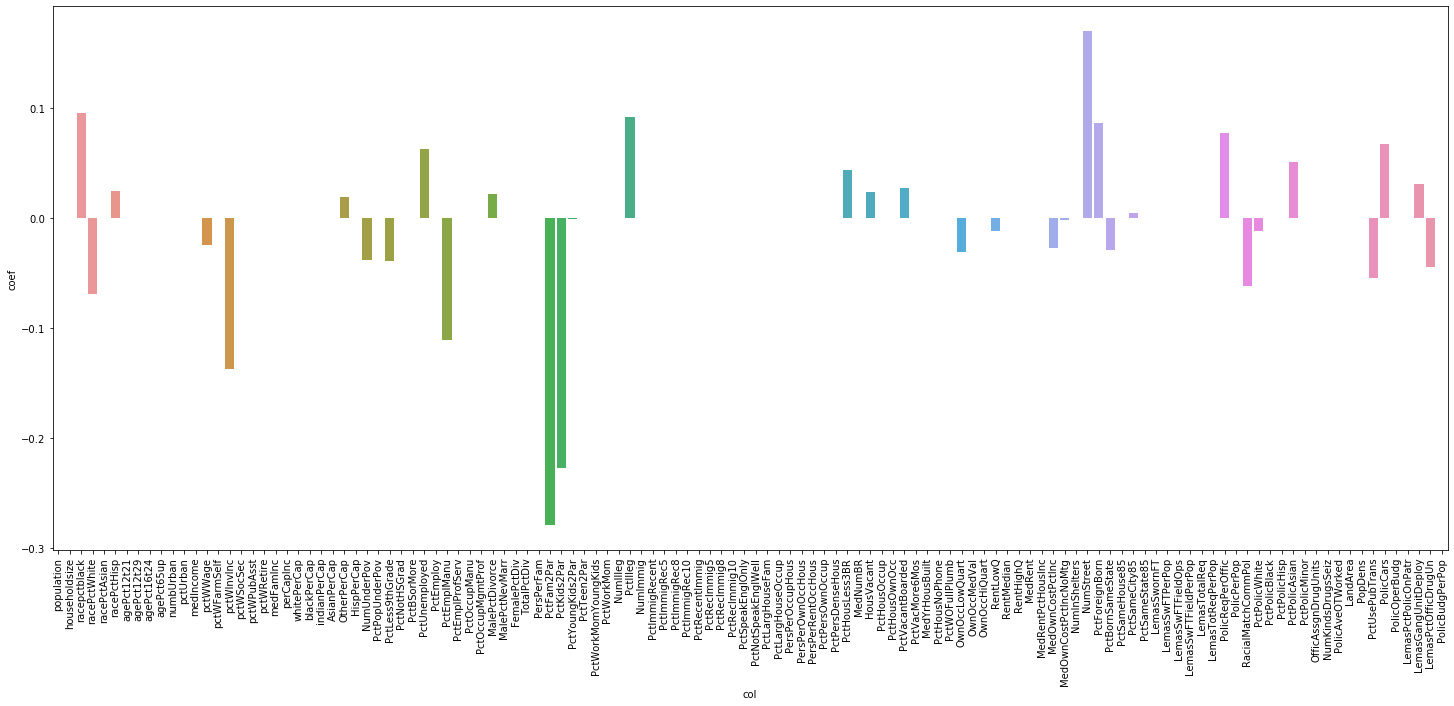

In [86]:
dd = pd.DataFrame({'col': features.columns, 'coef': clf.coef_})
plt.figure(figsize=(25,10))
ax = sns.barplot(x = 'col', y = 'coef', data = dd)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [110]:
results = pd.DataFrame(columns = ['alpha', 'col', 'coef'])
for alpha in np.arange(0.0001, 5, .01):
    clf = linear_model.Lasso(alpha = alpha)
    clf.fit(features, target)
    dd = pd.DataFrame({'col': features.columns, 'coef': clf.coef_})
    dd['alpha'] = alpha
    results = results.append(dd, sort = False)
    
print('Done Lassoing....')

Done Lassoing....


In [111]:
results.head()

,alpha,col,coef
0,0.0001,population,0.000000
1,0.0001,householdsize,0.445987
2,0.0001,racepctblack,-0.000000
3,0.0001,racePctWhite,-0.000000
4,0.0001,racePctAsian,-0.032952


plt.figure(figsize=(25,10))
ax = sns.lineplot(x = 'alpha', y = 'coef', hue = 'col', data = results)
ax.set(ylim = (-2.5, 2.5))

### Ridge Regression

In [112]:
from sklearn import linear_model
alpha = 0.25
clf = linear_model.Ridge(alpha = alpha)
clf.fit(features, target)

Ridge(alpha=0.25, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [114]:
results = pd.DataFrame(columns = ['alpha', 'col', 'coef'])

for alpha in np.arange(0.01, 5, .01):
    clf = linear_model.Ridge(alpha = alpha)
    clf.fit(features, target)
    dd = pd.DataFrame({'col': features.columns, 'coef': clf.coef_})
    dd['alpha'] = alpha
    results = results.append(dd, sort = False)

print('Done Ridging....')

Done Ridging....


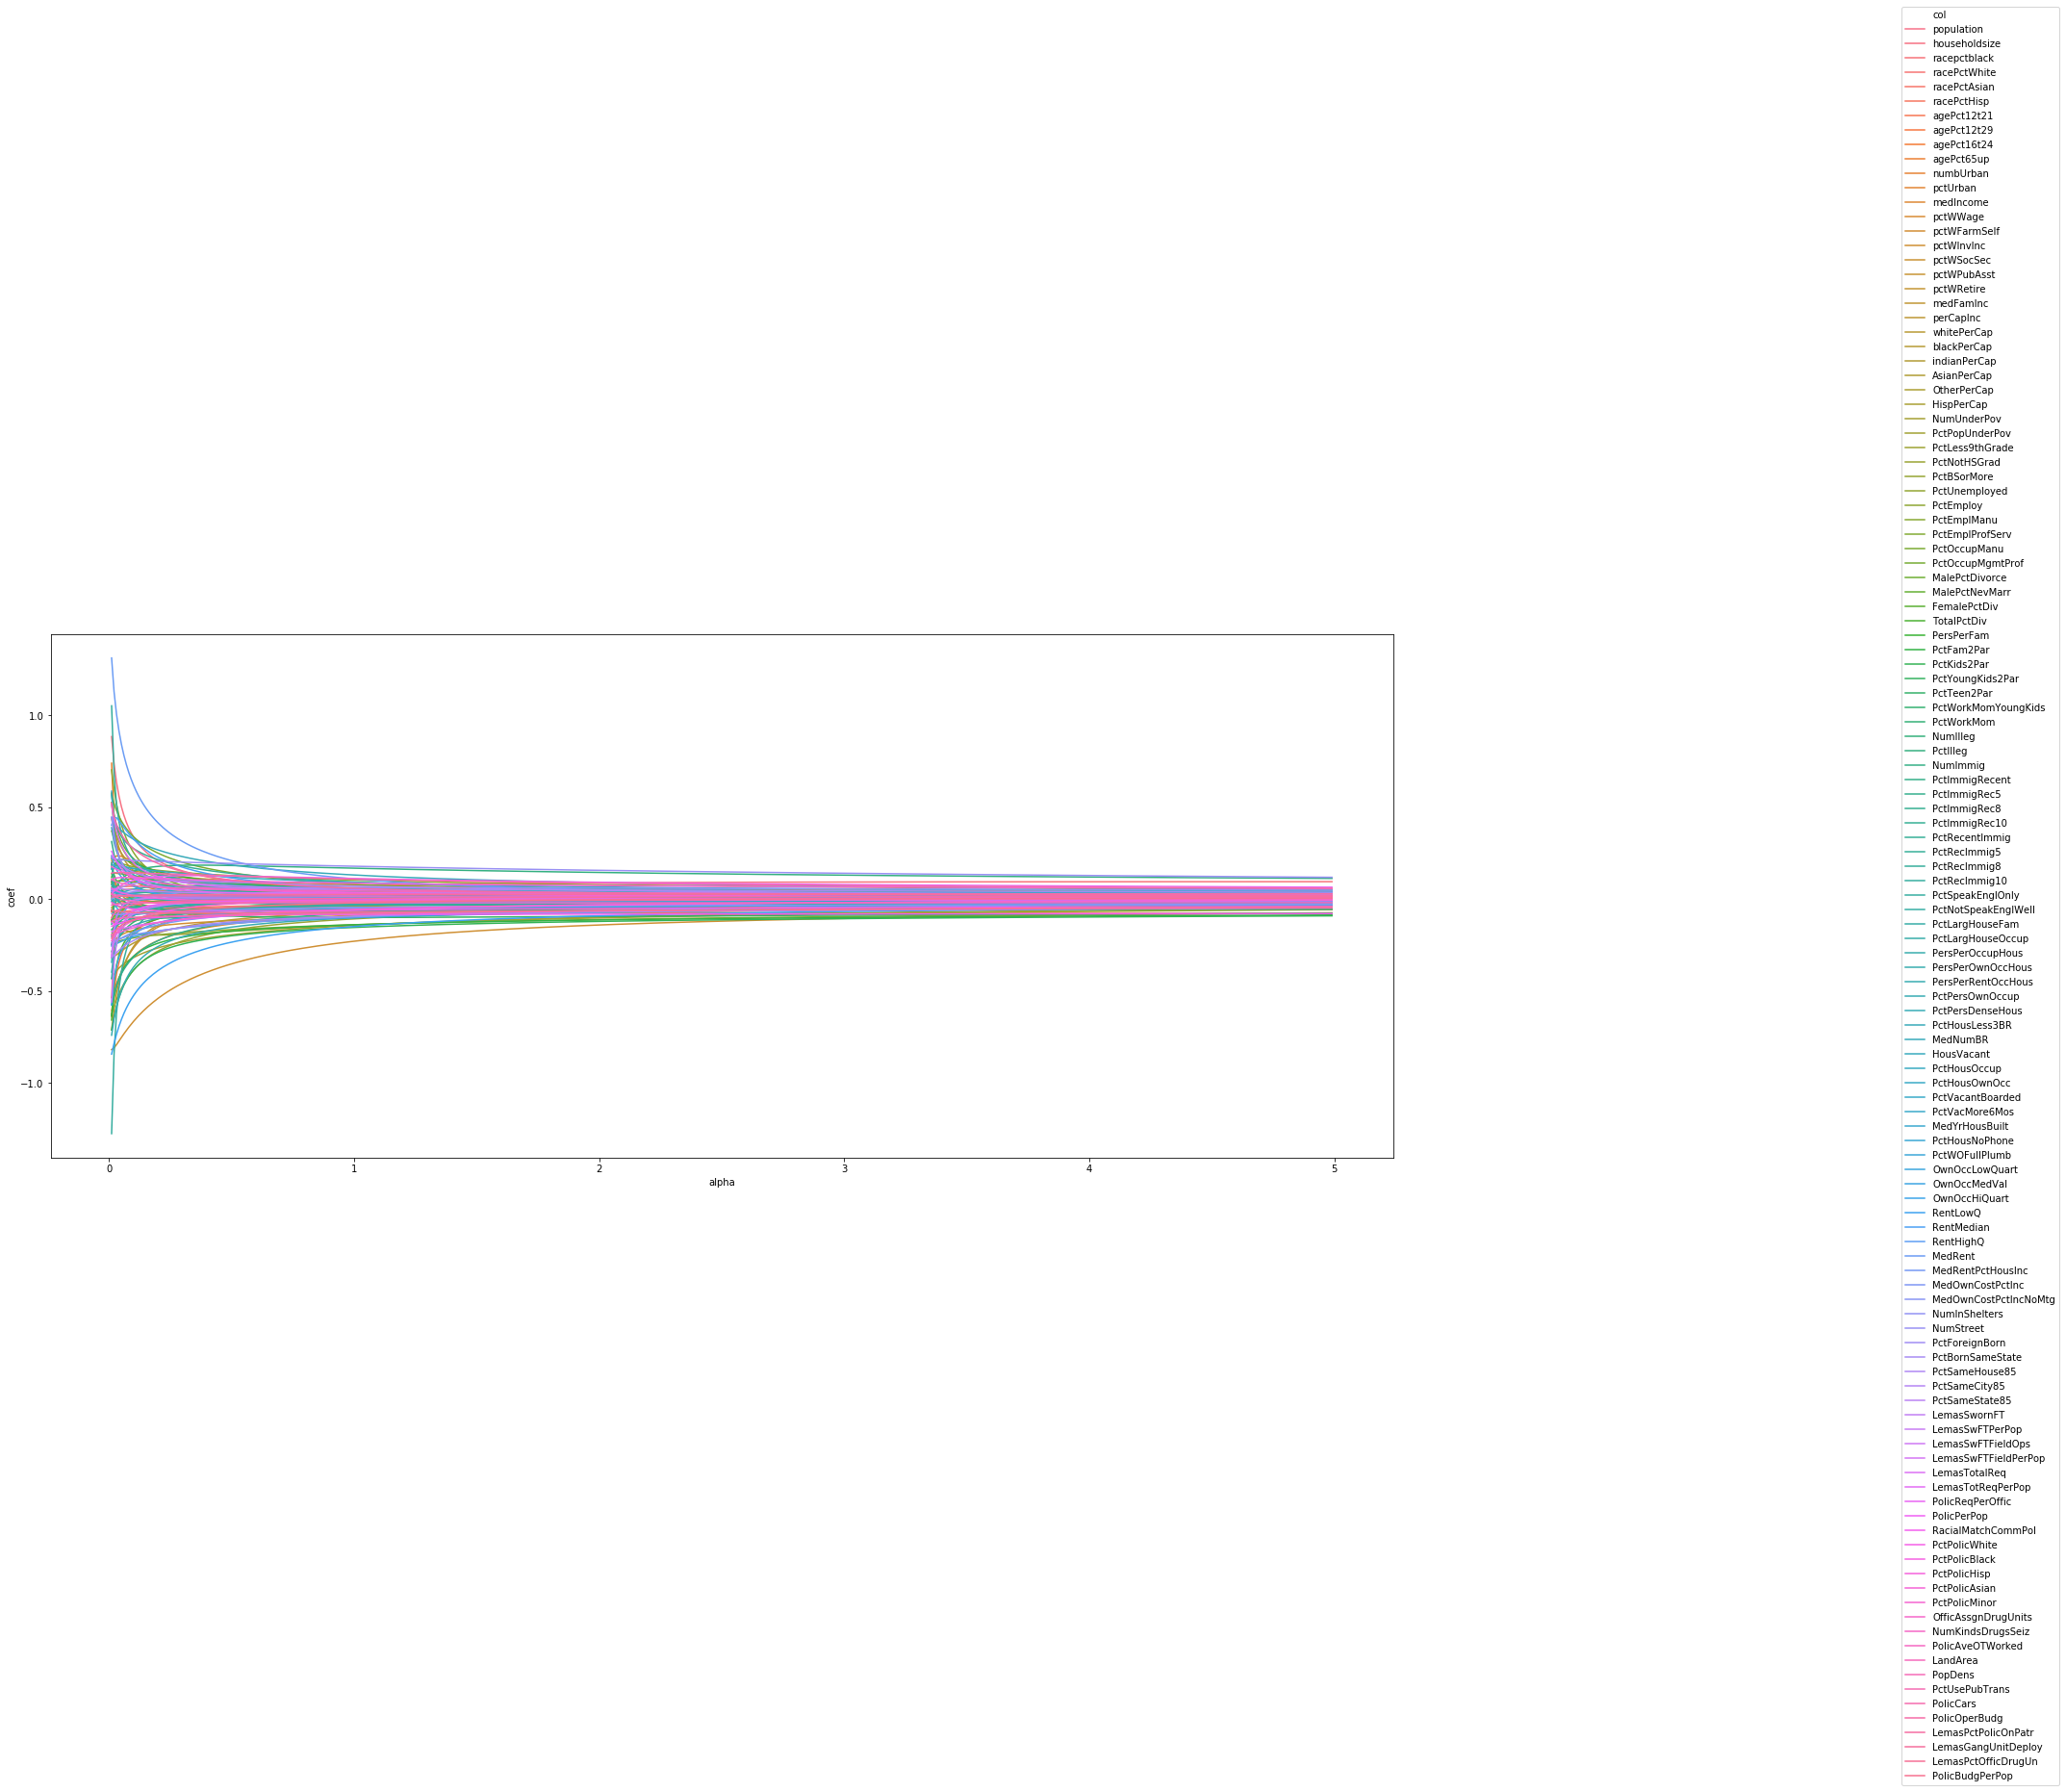

In [115]:
plt.figure(figsize=(25,10))
ax = sns.lineplot(x = 'alpha', y = 'coef', hue = 'col', data = results)
ax.legend(loc = 'center right', bbox_to_anchor = (1.5, 0.5), ncol = 1);

## Step 3: Describe Your Findings

### Problem: 

Identify which are the most important features or attributes that contribute to crime. 

### Summary

**Pearson's Correlation Coefficient**: With the decision to include even moderately correlated variables at C > .3 that gave us 33 features.

**Back Selection**: This method along, using cross validation, gave us 24 features to consider.

**Forward Selection:** Suggested around 40 features to consider. With a little more time I would be able to programmatically fish out the correct number using the best avg_score field.

**Lasso & Ridge:** There's so much going on and I didn't give myself enough time to make sense of it. Next time. 